In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('experiment_lesson_4.csv')

In [ ]:
df = data.copy()

In [ ]:
df.groupby('experiment_group')['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
experiment_group,,,,,,,,
control,10092.0,45.065101,9.990017,15.0,38.0,45.0,52.0,83.0
test,10104.0,39.046813,9.883308,10.0,32.0,39.0,46.0,75.0


In [ ]:
df.isna().sum()

,0
order_id,0
delivery_time,0
district,0
experiment_group,0


In [ ]:
df['experiment_group'].value_counts()

,count
experiment_group,
test,10104
control,10092


In [ ]:
control_times = df[df['experiment_group'] == 'control']['delivery_time']
test_times = df[df['experiment_group'] == 'test']['delivery_time']

In [ ]:
print('Разница в размерах выборок: ', abs(len(control_times) - len(test_times)))

Разница в размерах выборок:  12


Text(0, 0.5, 'Frequency')

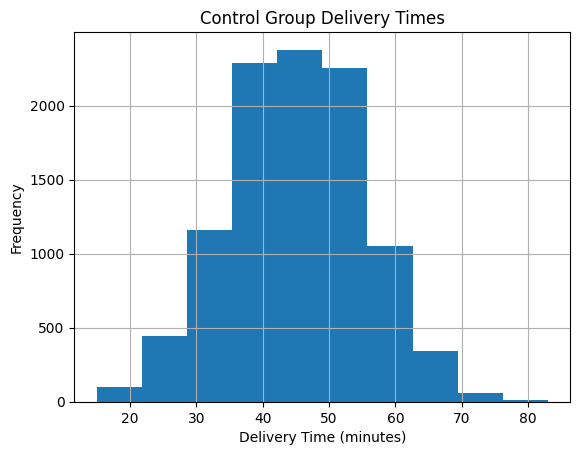

In [ ]:
control_times.hist()
plt.title('Control Group Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

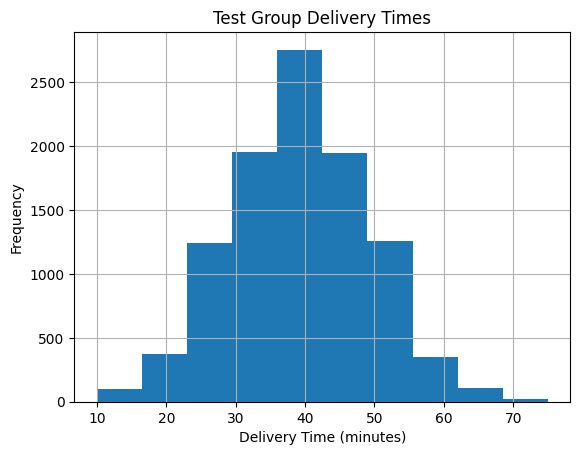

In [ ]:
test_times.hist()
plt.title('Test Group Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет.
Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть.

Уровень значимости определим 0,05

In [ ]:
from scipy.stats import normaltest

normal_control = normaltest(control_times)
normal_test = normaltest(test_times)

normal_control, normal_test

(NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654),
 NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173))

По результатам теста у нас есть основания отвергнуть гипотезу о нормальности тестовой группы, однако их недостаточно для того, чтобы отвергнуть гипотезу о нормальности контрольной выборки -> принимаем.

In [ ]:
import numpy as np


control_mean, tedt_mean = control_times.mean(), test_times.mean()

In [ ]:
import numpy as np


control_mean, test_mean = control_times.mean(), test_times.mean()


control_s, test_s = np.var(control_times, ddof=1), np.var(test_times, ddof=1)

n, m = len(control_times), len(test_times)

SE = np.sqrt(control_s / n + test_s / m)

t_stat = (control_mean - test_mean) / SE
print('t-Статистика: ', t_stat)

t-Статистика:  43.03555202423979


In [ ]:
from scipy.stats import ttest_ind
t_stat_one_sided, p_value_one_sided = ttest_ind(
    control_times, test_times, equal_var=False, alternative='greater'
)

t_stat_one_sided, p_value_one_sided

(43.035552024241454, 0.0)

Результаты:

Среднее время доставки контрольной группы: 45.07 минут

Среднее время доставки тестовой группы: 39.05 минут

p-value : 0.0 (< 0.05)

t-статистика: 43.04

научный: На уровне значимости 0.05 у нас есть веские основания отвергнуть нулевую гипотезу в пользу альтернативной, и считать, что среднее время доставки двух независимых выборок статистически значимо различается из-за введения в использование новой фичи. Несмотря на то, что проверка нормальности тестовой выборки показала отрицательный результат, было принято решение использовать односторонний t-test для независимых выборок, так как размеры выборок достаточно большие, кроме того на графике видно, что в выборках нет критичных выбросов или отклонений.

Популярный:
Эксперимент показал, что курьеры с новой функцией «доставка по пути домой» доставляют заказы в среднем на 6 минут быстрее. Разница между двумя группами достаточно велика, чтобы её нельзя было объяснить случайностью. Поскольку разница в эффективности статистически значима, рекомендуется внедрить новый алгоритм на всех курьеров. Это приведет к сокращению времени доставки и, вероятно, улучшит общую эффективность работы компании.